# Creating the Sentiment Variable

In [1]:
# Loading in saved final dataset without going through previous data exploration
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Mount the drive
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [2]:
# Load Data
df = pd.read_csv('/content/drive/My Drive/Masters Thesis/Colab notebook/clean_train.csv')
df.head()

,Unnamed: 0,Author_Handle,Date,X_Post,Reply_Count,Repost_Count,Like_Count,View_Count,Follower_Count,Verified_Status,Prediction,Confidence,Replying_to,date,post_text
0,22350,021Investment,2023-03-30 17:40:11,"As I pointed out yesterday, market is priced p...",0,0,0,48,22,0,negative,0.962576,False,2023-03-30 17:40:11,as i pointed out yesterday market is priced pe...
1,22588,021Investment,2023-04-04 15:39:16,People rushing into big tech for safety. But w...,0,0,1,26,22,0,neutral,0.535091,False,2023-04-04 15:39:16,people rushing into big tech for safety but wh...
2,25970,0Kiwii3,2023-06-02 20:20:37,"Will this be the day for #Sofi ? June14, where...",1,0,3,277,24,0,neutral,0.997390,False,2023-06-02 20:20:37,will this be the day for sofi june14 where th...
3,31281,0WLTrader,2023-10-05 23:44:30,The $USDJPY trade is very important for the #N...,0,0,0,67,262,0,neutral,0.993311,False,2023-10-05 23:44:30,the usdjpy trade is very important for the nik...
4,16498,0XGiorgos,2022-12-20 07:25:04,$BOJ also increased their bond purchases.... s...,0,1,1,139,151,1,negative,0.665027,False,2022-12-20 07:25:04,boj also increased their bond purchases seems ...


## Mapping Columns before creating the variables

In [3]:
# Rename prediction to sentiment
df = df.rename(columns={'Prediction': 'Sentiment'})

# Select relevant columns
columns_to_keep = [
    'Sentiment', 'Date', 'X_Post', 'Reply_Count', 'Repost_Count', 'Like_Count',
    'View_Count', 'Follower_Count', 'Verified_Status', 'Confidence'
]

influence_df = df[columns_to_keep].copy()

In [9]:
influence_df['Confidence'] = influence_df['Confidence'].astype(str).str.replace(',', '.').astype(float)

# Compute sentiment score using confidence
def compute_sentiment_score(row):
    sentiment = row['Sentiment']
    confidence = row['Confidence']

    if sentiment == 'positive':
        return confidence
    elif sentiment == 'negative':
        return -confidence
    elif sentiment == 'neutral':
        # Neutral scores range from -0.1 to +0.1 based on confidence
        return (confidence - 0.5) * 0.2  # center at 0
    else:
        return 0  # fallback for unknown labels

influence_df['Sentiment_score'] = influence_df.apply(compute_sentiment_score, axis=1)



In [10]:
df.shape

(32221, 15)

In [11]:
influence_df.isna().any().any()

np.False_

In [12]:
# Load val + test set
df_val = pd.read_csv('/content/drive/My Drive/Masters Thesis/Colab notebook/clean_val.csv')
df_test = pd.read_csv('/content/drive/My Drive/Masters Thesis/Colab notebook/clean_test.csv')


In [13]:
df_val = df_val.rename(columns={'Prediction': 'Sentiment'})
df_test = df_test.rename(columns={'Prediction': 'Sentiment'})

# -----------------------------
# Convert and compute for df_val
# -----------------------------
df_val['Confidence'] = df_val['Confidence'].astype(str).str.replace(',', '.').astype(float)

def compute_sentiment_score(row):
    sentiment = row['Sentiment']
    confidence = row['Confidence']

    if sentiment == 'positive':
        return confidence  # e.g., +0.97
    elif sentiment == 'negative':
        return -confidence  # e.g., -0.92
    elif sentiment == 'neutral':
        # Neutral scores range from -0.1 to +0.1 based on confidence
        return (confidence - 0.5) * 0.2  # center at 0
    else:
        return 0  # fallback for unknown labels

df_val['Sentiment_score'] = df_val.apply(compute_sentiment_score, axis=1)

# -----------------------------
# Convert and compute for df_test
# -----------------------------
df_test['Confidence'] = df_test['Confidence'].astype(str).str.replace(',', '.').astype(float)

df_test['Sentiment_score'] = df_test.apply(compute_sentiment_score, axis=1)

In [14]:
df_test.head()

,Unnamed: 0,Author_Handle,Date,X_Post,Reply_Count,Repost_Count,Like_Count,View_Count,Follower_Count,Verified_Status,Sentiment,Confidence,Replying_to,date,post_text,Sentiment_score
0,1667,0xAndr0meda,2024-08-03 10:30:22,Not gonna lie there's a long way to go to the ...,0,0,0,148,271,1,negative,0.985900,False,2024-08-03 10:30:22,not gonna lie theres a long way to go to the b...,-0.985900
1,3920,0xGrizman,2024-10-03 18:10:57,Aping more $SPX dips in here. #SPX6900 at $180...,1,1,2,1271,46300,1,positive,0.953780,False,2024-10-03 18:10:57,aping more spx dips in here spx6900 at 180m mc...,0.953780
2,4065,0xGrizman,2024-10-08 20:29:22,$SPX migrated to a new CTO group &amp; some ba...,5,9,12,540,46300,1,neutral,0.996981,False,2024-10-08 20:29:22,spx migrated to a new cto group amp some based...,0.099396
3,4143,0xGrizman,2024-10-09 15:18:59,#SPX500 still had a chance to follow the $SPX ...,20,19,21,597,46300,1,positive,0.697969,False,2024-10-09 15:18:59,spx500 still had a chance to follow the spx de...,0.697969
4,4302,0xGrizman,2024-10-11 17:39:34,#SPX500 GOING UP 🧲📈\n\n\n\n#SPX500 #SPX #SPX6900,14,10,16,656,46300,1,positive,0.996441,False,2024-10-11 17:39:34,spx500 going up \n\n\n\nspx500 spx spx6900,0.996441


## Using Ratios

In [15]:
from scipy.stats import boxcox
import numpy as np

engagement_cols = ['Like_Count', 'Repost_Count', 'Reply_Count']

# Dictionary to store lambda values for future use (validation/test sets)
boxcox_lambdas = {}

# Apply boxcox transformation
for col in engagement_cols:
    # Add 1 if zeros are present
    if (influence_df[col] <= 0).any():
        transformed, lam = boxcox(influence_df[col] + 1)
    else:
        transformed, lam = boxcox(influence_df[col])

    # Store transformed column and lambda
    influence_df[f'{col}_boxcox'] = transformed
    boxcox_lambdas[col] = lam

# Calculate global engagement totals
total_likes = influence_df['Like_Count_boxcox'].sum()
total_reposts = influence_df['Repost_Count_boxcox'].sum()
total_replies = influence_df['Reply_Count_boxcox'].sum()
total_engagement = total_likes + total_reposts + total_replies

# Calculate global weights
like_weight = total_likes / total_engagement
repost_weight = total_reposts / total_engagement
reply_weight = total_replies / total_engagement

print("Engagement Weights:")
print(f"Like: {like_weight:.3f}, Repost: {repost_weight:.3f}, Reply: {reply_weight:.3f}")


# Calculate engagement score
influence_df['Engagement_Score'] = (
    influence_df['Like_Count'] * like_weight +
    influence_df['Repost_Count'] * repost_weight +
    influence_df['Reply_Count'] * reply_weight
)

print("Sample Engagement Scores:")
print(influence_df[['Like_Count', 'Repost_Count', 'Reply_Count', 'Engagement_Score']].head(10))

Engagement Weights:
Like: 0.690, Repost: 0.137, Reply: 0.173
Sample Engagement Scores:
   Like_Count  Repost_Count  Reply_Count  Engagement_Score
0           0             0            0          0.000000
1           1             0            0          0.690357
2           3             0            1          2.244114
3           0             0            0          0.000000
4           1             1            0          0.826956
5           2             0            0          1.380714
6           1             0            0          0.690357
7           0             1            0          0.136599
8           0             0            0          0.000000
9          36            12            2         26.838125


Apply to val + test sets

In [16]:
from scipy.special import boxcox1p

# Apply weights to validation set
df_val['Engagement_Score'] = (
    like_weight * df_val['Like_Count'] +
    repost_weight * df_val['Repost_Count'] +
    reply_weight * df_val['Reply_Count']
)

# Apply to test set
df_test['Engagement_Score'] = (
    like_weight * df_test['Like_Count'] +
    repost_weight * df_test['Repost_Count'] +
    reply_weight * df_test['Reply_Count']
)


In [17]:
df_val.head()
df_val.shape

(7898, 17)

In [18]:
df_test.head()
df_test.shape

(7516, 17)

## Random Forest

Feature Importance (Impurity-Based):
Like_Count      0.442282
Repost_Count    0.299711
Reply_Count     0.258007
dtype: float64
Feature Importance Weights:
Like_Count      0.442282
Repost_Count    0.299711
Reply_Count     0.258007
dtype: float64
Permutation-Based Feature Weights:
Like_Count      0.389632
Repost_Count    0.314206
Reply_Count     0.296162
dtype: float64
Mean Permutation Importance Scores:
Like_Count      0.019045
Repost_Count    0.015358
Reply_Count     0.014476
dtype: float64
Standard Deviation of Importance:
Repost_Count    0.001019
Reply_Count     0.000913
Like_Count      0.000889
dtype: float64


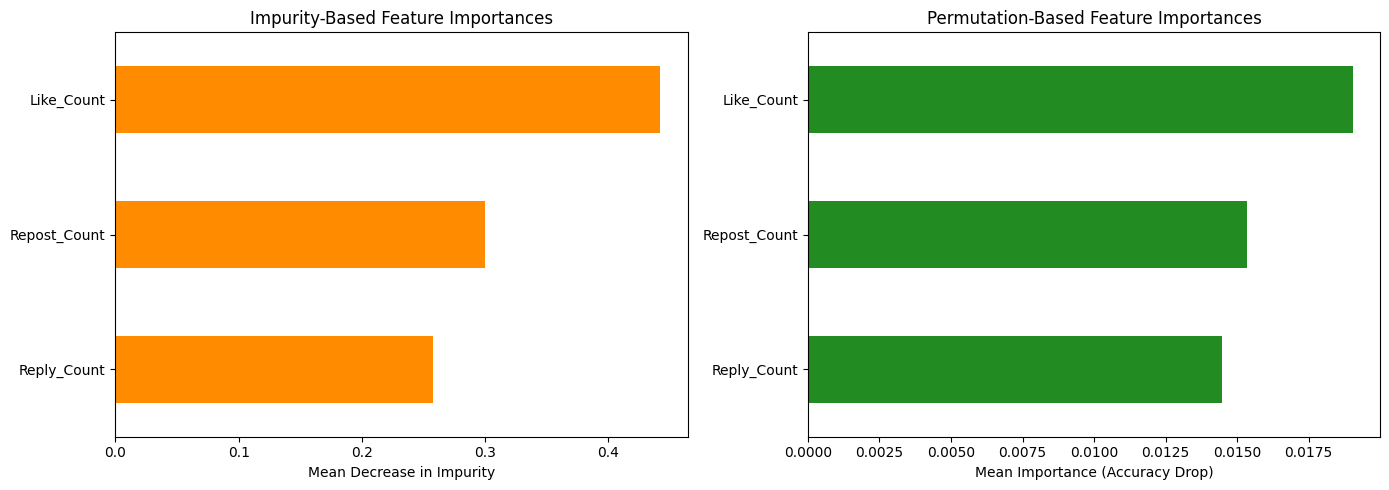

In [34]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.inspection import permutation_importance
from sklearn.model_selection import train_test_split

features = ['Like_Count', 'Repost_Count', 'Reply_Count']
X = influence_df[features]
y = influence_df['Sentiment_score']

# -------------------------------
# Train RandomForest Classifier
# -------------------------------
rf = RandomForestRegressor(
    n_estimators=200,
    max_depth=10,
    min_samples_split=5,
    min_samples_leaf=2,
    max_features=2,
    random_state=42
)

rf.fit(X, y)

# --------------------
# IMPURITY IMPORTANCE
# --------------------
impurity_importance = pd.Series(rf.feature_importances_, index=features).sort_values(ascending=False)
print("Feature Importance (Impurity-Based):")
print(impurity_importance)

impurity_weights = impurity_importance / impurity_importance.sum()
print("Feature Importance Weights:")
print(impurity_weights)

# ---------------------
# PERMUTATION IMPORTANCE
# ---------------------
perm_result = permutation_importance(rf, X, y, n_repeats=10, random_state=42, n_jobs=-1)
perm_importance_df = pd.Series(perm_result.importances_mean, index=features).sort_values(ascending=False)
perm_weights = perm_importance_df / perm_importance_df.sum()
print("Permutation-Based Feature Weights:")
print(perm_weights)

print("Mean Permutation Importance Scores:")
print(perm_importance_df.sort_values(ascending=False))

perm_importance_std = pd.Series(perm_result.importances_std, index=X.columns)
print("Standard Deviation of Importance:")
print(perm_importance_std.sort_values(ascending=False))

# ---------------------
# Plot Feature Importances
# ---------------------
fig, axes = plt.subplots(ncols=2, figsize=(14, 5))

impurity_importance.sort_values().plot(kind='barh', ax=axes[0], color='darkorange')
axes[0].set_title("Impurity-Based Feature Importances")
axes[0].set_xlabel("Mean Decrease in Impurity")

perm_importance_df.sort_values().plot(kind='barh', ax=axes[1], color='forestgreen')
axes[1].set_title("Permutation-Based Feature Importances")
axes[1].set_xlabel("Mean Importance (Accuracy Drop)")

plt.tight_layout()
plt.show()


In [35]:
# engagement score impurity
influence_df['Engagement_Impurity'] = (
    impurity_weights['Like_Count'] * influence_df['Like_Count'] +
    impurity_weights['Repost_Count'] * influence_df['Repost_Count'] +
    impurity_weights['Reply_Count'] * influence_df['Reply_Count']
)

# engagement score permutation
influence_df['Engagement_permutation'] = (
    perm_weights['Like_Count'] * influence_df['Like_Count'] +
    perm_weights['Repost_Count'] * influence_df['Repost_Count'] +
    perm_weights['Reply_Count'] * influence_df['Reply_Count']
)

Apply to val and test set

In [36]:
# --------------------
# IMPURITY WEIGHTS
# --------------------

# Compute engagement score on validation set
df_val['Engagement_Impurity'] = (
    impurity_weights['Like_Count'] * df_val['Like_Count'] +
    impurity_weights['Repost_Count'] * df_val['Repost_Count'] +
    impurity_weights['Reply_Count'] * df_val['Reply_Count']
)

# Compute engagement score on test set
df_test['Engagement_Impurity'] = (
    impurity_weights['Like_Count'] * df_test['Like_Count'] +
    impurity_weights['Repost_Count'] * df_test['Repost_Count'] +
    impurity_weights['Reply_Count'] * df_test['Reply_Count']
)

# ---------------------
# PERMUTATION IMPORTANCE
# ---------------------

# Compute engagement score on validation set
df_val['Engagement_permutation'] = (
    perm_weights['Like_Count'] * df_val['Like_Count'] +
    perm_weights['Repost_Count'] * df_val['Repost_Count'] +
    perm_weights['Reply_Count'] * df_val['Reply_Count']
)

# Compute engagement score on test set
df_test['Engagement_permutation'] = (
    perm_weights['Like_Count'] * df_test['Like_Count'] +
    perm_weights['Repost_Count'] * df_test['Repost_Count'] +
    perm_weights['Reply_Count'] * df_test['Reply_Count']
)

SHAP Feature Importance Weights:
Like_Count      0.415297
Repost_Count    0.272945
Reply_Count     0.311758
dtype: float64


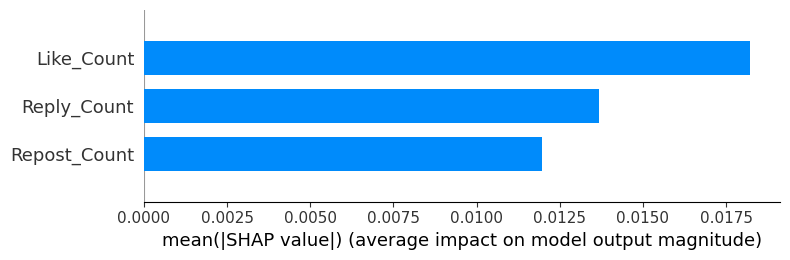

In [37]:
import shap

# Create SHAP explainer for the regressor
explainer = shap.TreeExplainer(rf)
shap_values = explainer.shap_values(X)  # This returns a 2D array for regression

# Get mean absolute SHAP values per feature
mean_abs_shap = np.abs(shap_values).mean(axis=0)  # shape: (n_features,)

# Normalize SHAP weights
shap_weights = pd.Series(mean_abs_shap, index=features)
shap_weights = shap_weights / shap_weights.sum()

print("SHAP Feature Importance Weights:")
print(shap_weights)

# ----------------------
# Plot SHAP Importance Bar
# ----------------------
shap.summary_plot(shap_values, X, plot_type="bar", show=True)


In [38]:
# engagement score
influence_df['Engagement_SHAP'] = (
    shap_weights['Like_Count'] * influence_df['Like_Count'] +
    shap_weights['Repost_Count'] * influence_df['Repost_Count'] +
    shap_weights['Reply_Count'] * influence_df['Reply_Count']
)

Apply to val and test

In [39]:
# Apply SHAP-based weights to compute engagement score in validation set
df_val['Engagement_SHAP'] = (
    shap_weights['Like_Count'] * df_val['Like_Count'] +
    shap_weights['Repost_Count'] * df_val['Repost_Count'] +
    shap_weights['Reply_Count'] * df_val['Reply_Count']
)

# Apply to test set
df_test['Engagement_SHAP'] = (
    shap_weights['Like_Count'] * df_test['Like_Count'] +
    shap_weights['Repost_Count'] * df_test['Repost_Count'] +
    shap_weights['Reply_Count'] * df_test['Reply_Count']
)

## Equal ratio

In [40]:
# Apply equal weights
influence_df['Engagement_Equal'] = (
    (1/3) * influence_df['Like_Count'] +
    (1/3) * influence_df['Repost_Count'] +
    (1/3) * influence_df['Reply_Count']
)

apply on val and test

In [41]:
# VAL
df_val['Engagement_Equal'] = (
    (1/3) * df_val['Like_Count'] +
    (1/3) * df_val['Repost_Count'] +
    (1/3) * df_val['Reply_Count']
)

# test
df_test['Engagement_Equal'] = (
    (1/3) * df_test['Like_Count'] +
    (1/3) * df_test['Repost_Count'] +
    (1/3) * df_test['Reply_Count']
)

In [42]:
influence_df.head()

,Sentiment,Date,X_Post,Reply_Count,Repost_Count,Like_Count,View_Count,Follower_Count,Verified_Status,Confidence,...,Engagement_Equal_Adjusted,SWIS_Equal,Engagement_Score_Adjusted,SWIS_Ratio,Engagement_Impurity_Adjusted,SWIS_Impurity,Engagement_permutation_Adjusted,SWIS_perm,Engagement_SHAP_Adjusted,SWIS_SHAP
0,negative,2023-03-30 17:40:11,"As I pointed out yesterday, market is priced p...",0,0,0,48,22,0,0.962576,...,1.000000,-3.018150,1.000000,-3.018150,1.000000,-3.018150,1.000000,-3.018150,1.000000,-3.018150
1,neutral,2023-04-04 15:39:16,People rushing into big tech for safety. But w...,0,0,1,26,22,0,0.535091,...,0.333333,0.007335,0.690357,0.015192,0.483163,0.010632,0.367685,0.008091,0.323810,0.007126
2,neutral,2023-06-02 20:20:37,"Will this be the day for #Sofi ? June14, where...",1,0,3,277,24,0,0.997390,...,1.333333,0.426943,2.244114,0.718582,1.733283,0.555010,1.471232,0.471100,1.218464,0.390161
3,neutral,2023-10-05 23:44:30,The $USDJPY trade is very important for the #N...,0,0,0,67,262,0,0.993311,...,1.000000,0.549761,1.000000,0.549761,1.000000,0.549761,1.000000,0.549761,1.000000,0.549761
4,negative,2022-12-20 07:25:04,$BOJ also increased their bond purchases.... s...,0,1,1,139,151,1,0.665027,...,0.666667,-2.227346,0.826956,-2.762876,0.716207,-2.392862,0.631822,-2.110930,0.752967,-2.515676


# Creating SWISS

In [43]:
influence_df.isna().any().any()

np.False_

In [44]:
print(influence_df['Follower_Count'].min())
print((~np.isfinite(influence_df['Sentiment_score'])).sum())  # should be 0
print((~np.isfinite(influence_df['Follower_Count'])).sum())   # should be 0

0
0
0


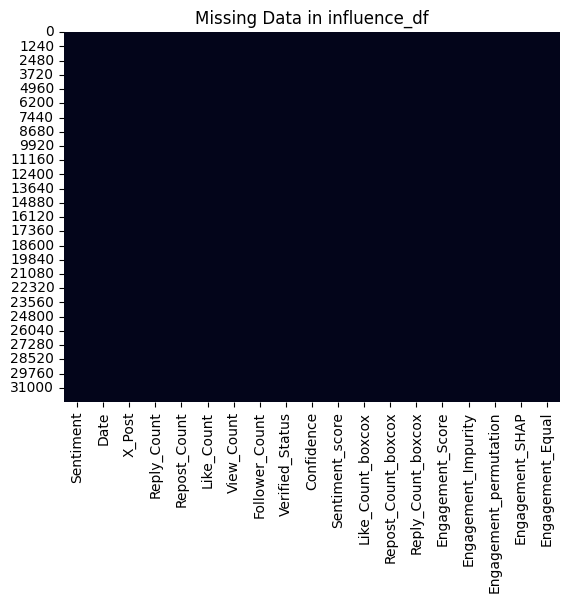

In [30]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.heatmap(influence_df.isna(), cbar=False)
plt.title("Missing Data in influence_df")
plt.show()

In [31]:
print(influence_df.columns.tolist())

['Sentiment', 'Date', 'X_Post', 'Reply_Count', 'Repost_Count', 'Like_Count', 'View_Count', 'Follower_Count', 'Verified_Status', 'Confidence', 'Sentiment_score', 'Like_Count_boxcox', 'Repost_Count_boxcox', 'Reply_Count_boxcox', 'Engagement_Score', 'Engagement_Impurity', 'Engagement_permutation', 'Engagement_SHAP', 'Engagement_Equal']


In [45]:
# Define the engagement score columns
engagement_score_cols = {
    'SWIS_Equal': 'Engagement_Equal',
    'SWIS_Ratio': 'Engagement_Score',
    'SWIS_Impurity': 'Engagement_Impurity',
    'SWIS_perm': 'Engagement_permutation',
    'SWIS_SHAP': 'Engagement_SHAP'
}

# Function to adjust engagement: replace 0 with 1 to neutralize
def adjust_engagement(x):
    return x if x != 0 else 1

# Loop through all SWIS variants and compute scores
for swis_col, engagement_col in engagement_score_cols.items():
    adjusted_col = f'{engagement_col}_Adjusted'

    # Adjust engagement score to avoid zeroing out SWIS
    influence_df[adjusted_col] = influence_df[engagement_col].apply(adjust_engagement)

    # Compute SWIS
    influence_df[swis_col] = (
        influence_df['Sentiment_score'] *
        influence_df[adjusted_col] *
        np.log1p(influence_df['Follower_Count'])
    )

In [46]:
influence_df.head(10)

,Sentiment,Date,X_Post,Reply_Count,Repost_Count,Like_Count,View_Count,Follower_Count,Verified_Status,Confidence,...,Engagement_Equal_Adjusted,SWIS_Equal,Engagement_Score_Adjusted,SWIS_Ratio,Engagement_Impurity_Adjusted,SWIS_Impurity,Engagement_permutation_Adjusted,SWIS_perm,Engagement_SHAP_Adjusted,SWIS_SHAP
0,negative,2023-03-30 17:40:11,"As I pointed out yesterday, market is priced p...",0,0,0,48,22,0,0.962576,...,1.000000,-3.018150,1.000000,-3.018150,1.000000,-3.018150,1.000000,-3.018150,1.000000,-3.018150
1,neutral,2023-04-04 15:39:16,People rushing into big tech for safety. But w...,0,0,1,26,22,0,0.535091,...,0.333333,0.007335,0.690357,0.015192,0.442282,0.009733,0.389632,0.008574,0.415297,0.009139
2,neutral,2023-06-02 20:20:37,"Will this be the day for #Sofi ? June14, where...",1,0,3,277,24,0,0.997390,...,1.333333,0.426943,2.244114,0.718582,1.584852,0.507481,1.465059,0.469123,1.557649,0.498771
3,neutral,2023-10-05 23:44:30,The $USDJPY trade is very important for the #N...,0,0,0,67,262,0,0.993311,...,1.000000,0.549761,1.000000,0.549761,1.000000,0.549761,1.000000,0.549761,1.000000,0.549761
4,negative,2022-12-20 07:25:04,$BOJ also increased their bond purchases.... s...,0,1,1,139,151,1,0.665027,...,0.666667,-2.227346,0.826956,-2.762876,0.741993,-2.479012,0.703838,-2.351535,0.688242,-2.299428
5,positive,2023-02-04 14:35:08,Official Trade Alert:\n4195/4200 4085/4080 @ 0...,0,0,2,698,2878,0,0.750291,...,0.666667,3.984142,1.380714,8.251440,0.884563,5.286338,0.779265,4.657052,0.830594,4.963805
6,negative,2023-03-10 03:38:53,"Can't say this enough, Stop loss must be respe...",0,0,1,606,2878,0,0.983605,...,0.333333,-2.611536,0.690357,-5.408675,0.442282,-3.465102,0.389632,-3.052616,0.415297,-3.253688
7,neutral,2022-05-03 11:46:06,#MicroStrategy one of the largest holders of #...,0,1,0,0,741,0,0.998436,...,0.333333,0.219622,0.136599,0.090001,0.299711,0.197470,0.314206,0.207020,0.272945,0.179834
8,positive,2022-10-11 12:32:58,If Unemployment claims was lesser than the for...,0,0,0,0,51,0,0.837382,...,1.000000,3.308701,1.000000,3.308701,1.000000,3.308701,1.000000,3.308701,1.000000,3.308701
9,positive,2022-03-30 05:58:12,It's coming $Yel $dYel #defi index like #SPX500,2,12,36,0,827,1,0.576212,...,16.666667,64.526279,26.838125,103.905860,20.034687,77.565830,18.389555,71.196574,18.849539,72.977437


Trying other possible variables

In [56]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

engagement_features = ['Like_Count', 'Repost_Count', 'Reply_Count', 'Follower_Count']

# ------------------------------
# engagement/follower metrics
# ------------------------------
influence_df['Engagement_per_follower'] = (
    (influence_df['Like_Count'] + influence_df['Repost_Count'] + influence_df['Reply_Count']) /
    (influence_df['Follower_Count'] + 1)
)

# ------------------------------
# PCA influence index
# ------------------------------
scaler = StandardScaler()
engagement_scaled = scaler.fit_transform(influence_df[engagement_features])

pca = PCA(n_components=1)
influence_df['PCA_influnece'] = pca.fit_transform(engagement_scaled)

influence_df['PCA_influnece_abs'] = np.abs(influence_df['PCA_influnece'])


# SWISS variants

influence_df['SWIS_metric'] = (
    influence_df['Sentiment_score'] *
    influence_df['Engagement_per_follower']
)

influence_df['SWIS_PCA'] = (
    influence_df['Sentiment_score'] *
    influence_df['PCA_influnece_abs']
)



In [58]:
influence_df[['Sentiment_score',
              'Engagement_per_follower', 'PCA_influnece', 'PCA_influnece_abs',
              'SWIS_metric', 'SWIS_PCA']].head()


,Sentiment_score,Engagement_per_follower,PCA_influnece,PCA_influnece_abs,SWIS_metric,SWIS_PCA
0,-0.962576,0.000000,-0.428369,0.428369,-0.000000,-0.412338
1,0.007018,0.043478,-0.384683,0.384683,0.000305,0.002700
2,0.099478,0.160000,-0.180543,0.180543,0.015916,0.017960
3,0.098662,0.000000,-0.422075,0.422075,0.000000,0.041643
4,-0.665027,0.013158,-0.190450,0.190450,-0.008750,-0.126654


In [69]:
influence_df.to_excel("/content/drive/MyDrive/Masters Thesis/Colab notebook/preprocessed_train_add.xlsx")

doing the same for test + val

In [47]:
# Define the engagement score columns
engagement_score_cols = {
    'SWIS_Equal': 'Engagement_Equal',
    'SWIS_Ratio': 'Engagement_Score',
    'SWIS_Impurity': 'Engagement_Impurity',
    'SWIS_perm': 'Engagement_permutation',
    'SWIS_SHAP': 'Engagement_SHAP'
}

# Helper function to replace 0 engagement with 1
def adjust_engagement(x):
    return x if x != 0 else 1

# Function to compute SWIS with adjustment
def compute_swis(df):
    for swis_col, engagement_col in engagement_score_cols.items():
        adjusted_col = f'{engagement_col}_Adjusted'
        df[adjusted_col] = df[engagement_col].apply(adjust_engagement)
        df[swis_col] = (
            df['Sentiment_score'] *
            df[adjusted_col] *
            np.log1p(df['Follower_Count'])
        )
    return df

# Apply to both validation and test sets
df_val = compute_swis(df_val)
df_test = compute_swis(df_test)

In [59]:
for df in [df_val, df_test]:
    df['Engagement_per_follower'] = (
        (df['Like_Count'] + df['Repost_Count'] + df['Reply_Count']) /
        (df['Follower_Count'] + 1)
    )

    # Scale using the scaler fitted on training data
    engagement_scaled = scaler.transform(df[engagement_features])

    # Apply PCA transform from training
    df['PCA_influnece'] = pca.transform(engagement_scaled)
    df['PCA_influnece_abs'] = np.abs(df['PCA_influnece'])

    # Compute SWIS variants using confidence-weighted sentiment
    df['SWIS_metric'] = df['Sentiment_score'] * df['Engagement_per_follower']
    df['SWIS_PCA'] = df['Sentiment_score'] * df['PCA_influnece_abs']

In [60]:
df_val.head()

,Unnamed: 0,Author_Handle,Date,X_Post,Reply_Count,Repost_Count,Like_Count,View_Count,Follower_Count,Verified_Status,...,SWIS_Impurity,Engagement_permutation_Adjusted,SWIS_perm,Engagement_SHAP_Adjusted,SWIS_SHAP,Engagement_per_follower,PCA_influnece,PCA_influnece_abs,SWIS_metric,SWIS_PCA
0,591,06AGA58,2023-11-10 15:25:41,"#SPX500 1. 2.7\nBonus :)\nLow risk, friday pum...",3,1,35,15083,17600,1,...,94.107855,14.839823,84.365036,15.743608,89.503094,0.002216,2.102692,2.102692,0.001289,1.222816
1,6764,0RN0IR,2024-04-19 18:29:52,Observing the #SPX500's movements can be like ...,1,0,2,136,958,1,...,7.393507,1.075427,6.959026,1.142352,7.392097,0.003128,-0.199733,0.199733,0.002948,0.188244
2,2228,0xBalkan,2023-12-20 09:35:47,"#SPX500 ATH Dec 2023, so $BTC ATH Dec 2024 and...",1,0,3,81,246,1,...,8.654325,1.465059,8.000179,1.557649,8.505780,0.016194,-0.174721,0.174721,0.016051,0.173175
3,4738,0xGabeDG,2024-02-23 17:22:03,This is a chart for the Argentine Merval. It a...,2,0,4,272,383,0,...,5.876203,2.150853,5.530887,2.284704,5.875082,0.015625,-0.010727,0.010727,0.006752,0.004636
4,4966,0xGabeDG,2024-03-01 21:37:24,#SPX500 breaking ATH every day with #US10 int...,0,0,0,124,383,0,...,4.305687,1.000000,4.305687,1.000000,4.305687,0.000000,-0.418901,0.418901,0.000000,0.303103


In [70]:
df_val.to_excel("/content/drive/MyDrive/Masters Thesis/Colab notebook/preprocessed_val_add.xlsx")
df_test.to_excel("/content/drive/MyDrive/Masters Thesis/Colab notebook/preprocessed_test_add.xlsx")

In [63]:
df_val.shape

(7898, 36)

In [68]:
df_test.columns

Index(['Unnamed: 0', 'Author_Handle', 'Date', 'X_Post', 'Reply_Count',
       'Repost_Count', 'Like_Count', 'View_Count', 'Follower_Count',
       'Verified_Status', 'Sentiment', 'Confidence', 'Replying_to', 'date',
       'post_text', 'Sentiment_score', 'Engagement_Score',
       'Engagement_Impurity', 'Engagement_permutation', 'Engagement_SHAP',
       'Engagement_Equal', 'Engagement_Equal_Adjusted', 'SWIS_Equal',
       'Engagement_Score_Adjusted', 'SWIS_Ratio',
       'Engagement_Impurity_Adjusted', 'SWIS_Impurity',
       'Engagement_permutation_Adjusted', 'SWIS_perm',
       'Engagement_SHAP_Adjusted', 'SWIS_SHAP', 'Engagement_per_follower',
       'PCA_influnece', 'PCA_influnece_abs', 'SWIS_metric', 'SWIS_PCA'],
      dtype='object')

In [65]:
influence_df.shape

(32221, 34)

In [67]:
influence_df.columns

Index(['Sentiment', 'Date', 'X_Post', 'Reply_Count', 'Repost_Count',
       'Like_Count', 'View_Count', 'Follower_Count', 'Verified_Status',
       'Confidence', 'Sentiment_score', 'Like_Count_boxcox',
       'Repost_Count_boxcox', 'Reply_Count_boxcox', 'Engagement_Score',
       'Engagement_Impurity', 'Engagement_permutation', 'Engagement_SHAP',
       'Engagement_Equal', 'Engagement_Equal_Adjusted', 'SWIS_Equal',
       'Engagement_Score_Adjusted', 'SWIS_Ratio',
       'Engagement_Impurity_Adjusted', 'SWIS_Impurity',
       'Engagement_permutation_Adjusted', 'SWIS_perm',
       'Engagement_SHAP_Adjusted', 'SWIS_SHAP', 'Engagement_per_follower',
       'PCA_influnece', 'SWIS_metric', 'SWIS_PCA', 'PCA_influnece_abs'],
      dtype='object')